In [5]:
import warnings
warnings.filterwarnings("ignore")

In [6]:
import numpy as np 
import pandas as pd 
import seaborn as sns 
import matplotlib.pyplot as plt
%matplotlib inline

In [7]:
import nltk
nltk.download()

NLTK Downloader
---------------------------------------------------------------------------
    d) Download   l) List    u) Update   c) Config   h) Help   q) Quit
---------------------------------------------------------------------------


Downloader>  d



Download which package (l=list; x=cancel)?


  Identifier>  all


       | 
       | Downloading package abc to /usr/share/nltk_data...
       |   Package abc is already up-to-date!
       | Downloading package alpino to /usr/share/nltk_data...
       |   Package alpino is already up-to-date!
       | Downloading package averaged_perceptron_tagger to
       |     /usr/share/nltk_data...
       |   Package averaged_perceptron_tagger is already up-to-date!
       | Downloading package averaged_perceptron_tagger_ru to
       |     /usr/share/nltk_data...
       |   Package averaged_perceptron_tagger_ru is already up-to-
       |       date!
       | Downloading package basque_grammars to
       |     /usr/share/nltk_data...
       |   Package basque_grammars is already up-to-date!
       | Downloading package biocreative_ppi to
       |     /usr/share/nltk_data...
       |   Package biocreative_ppi is already up-to-date!
       | Downloading package bllip_wsj_no_aux to
       |     /usr/share/nltk_data...
       |   Package bllip_wsj_no_aux is already u


---------------------------------------------------------------------------
    d) Download   l) List    u) Update   c) Config   h) Help   q) Quit
---------------------------------------------------------------------------


Downloader>  q


True

In [8]:
data = pd.read_csv("../input/sentiment140/training.1600000.processed.noemoticon.csv", encoding = "ISO-8859-1")

### EDA

In [9]:
data.head()

,0,1467810369,Mon Apr 06 22:19:45 PDT 2009,NO_QUERY,_TheSpecialOne_,"@switchfoot http://twitpic.com/2y1zl - Awww, that's a bummer. You shoulda got David Carr of Third Day to do it. ;D"
0,0,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,is upset that he can't update his Facebook by ...
1,0,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,@Kenichan I dived many times for the ball. Man...
2,0,1467811184,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire
3,0,1467811193,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,Karoli,"@nationwideclass no, it's not behaving at all...."
4,0,1467811372,Mon Apr 06 22:20:00 PDT 2009,NO_QUERY,joy_wolf,@Kwesidei not the whole crew


In [10]:
data.columns = ["label", "time", "date", "query", "username", "text"]

In [11]:
data.head()

,label,time,date,query,username,text
0,0,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,is upset that he can't update his Facebook by ...
1,0,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,@Kenichan I dived many times for the ball. Man...
2,0,1467811184,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire
3,0,1467811193,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,Karoli,"@nationwideclass no, it's not behaving at all...."
4,0,1467811372,Mon Apr 06 22:20:00 PDT 2009,NO_QUERY,joy_wolf,@Kwesidei not the whole crew


In [12]:
len(data)

1599999

In [13]:
data.shape

(1599999, 6)

In [14]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599999 entries, 0 to 1599998
Data columns (total 6 columns):
 #   Column    Non-Null Count    Dtype 
---  ------    --------------    ----- 
 0   label     1599999 non-null  int64 
 1   time      1599999 non-null  int64 
 2   date      1599999 non-null  object
 3   query     1599999 non-null  object
 4   username  1599999 non-null  object
 5   text      1599999 non-null  object
dtypes: int64(2), object(4)
memory usage: 73.2+ MB


In [15]:
data.dtypes

label        int64
time         int64
date        object
query       object
username    object
text        object
dtype: object

In [16]:
np.sum(data.isnull().any(axis=1))

0

In [17]:
data.label.unique()

array([0, 4])

In [18]:
data=data[['text','label']]

In [19]:
data.head()

,text,label
0,is upset that he can't update his Facebook by ...,0
1,@Kenichan I dived many times for the ball. Man...,0
2,my whole body feels itchy and like its on fire,0
3,"@nationwideclass no, it's not behaving at all....",0
4,@Kwesidei not the whole crew,0


In [20]:
data['label'][data['label']==4]=1

In [21]:
data.label.unique()

array([0, 1])

In [22]:
data['text']=data['text'].str.lower()

In [23]:
data['text'].tail()

1599994    just woke up. having no school is the best fee...
1599995    thewdb.com - very cool to hear old walt interv...
1599996    are you ready for your mojo makeover? ask me f...
1599997    happy 38th birthday to my boo of alll time!!! ...
1599998    happy #charitytuesday @thenspcc @sparkscharity...
Name: text, dtype: object

### Since Dataset is Large, Taking 1/4th of Dataset

In [24]:
data_pos = data[data['label'] == 1]
data_neg = data[data['label'] == 0]

In [25]:
data_pos = data_pos.iloc[:int(20000)]
data_neg = data_neg.iloc[:int(20000)]
data = pd.concat([data_pos, data_neg])

In [26]:
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from nltk.tokenize import RegexpTokenizer

### Removing Stopwords

In [27]:
stopwords_list = stopwords.words('english')

In [28]:
", ".join(stopwords.words('english'))

"i, me, my, myself, we, our, ours, ourselves, you, you're, you've, you'll, you'd, your, yours, yourself, yourselves, he, him, his, himself, she, she's, her, hers, herself, it, it's, its, itself, they, them, their, theirs, themselves, what, which, who, whom, this, that, that'll, these, those, am, is, are, was, were, be, been, being, have, has, had, having, do, does, did, doing, a, an, the, and, but, if, or, because, as, until, while, of, at, by, for, with, about, against, between, into, through, during, before, after, above, below, to, from, up, down, in, out, on, off, over, under, again, further, then, once, here, there, when, where, why, how, all, any, both, each, few, more, most, other, some, such, no, nor, not, only, own, same, so, than, too, very, s, t, can, will, just, don, don't, should, should've, now, d, ll, m, o, re, ve, y, ain, aren, aren't, couldn, couldn't, didn, didn't, doesn, doesn't, hadn, hadn't, hasn, hasn't, haven, haven't, isn, isn't, ma, mightn, mightn't, mustn, mus

### Removing Punctuations

In [29]:
import string

In [30]:
english_punctuations = string.punctuation
punctuations_list = english_punctuations
def cleaning_punctuations(text):
    translator = str.maketrans('', '', punctuations_list)
    return text.translate(translator)

In [31]:
data['text']= data['text'].apply(lambda x: cleaning_punctuations(x))
data['text'].tail()

19995                            one more day of holidays 
19996    feeling so down right now  i hate you damn hum...
19997    geezi hv to read the whole book of personality...
19998    i threw my sign at donnie and he bent over to ...
19999    heather2711 good thing i didnt find any then  ...
Name: text, dtype: object

### Removing repeating characters

In [32]:
import re

In [33]:
def cleaning_repeating_char(text):
    return re.sub(r'(.)\1+', r'\1', text)

In [34]:
data['text'] = data['text'].apply(lambda x: cleaning_repeating_char(x))
data['text'].tail()

19995                            one more day of holidays 
19996    feling so down right now i hate you damn humprey 
19997    gezi hv to read the whole bok of personality t...
19998    i threw my sign at donie and he bent over to g...
19999    heather271 god thing i didnt find any then non...
Name: text, dtype: object

### Removing Emails

In [35]:
def cleaning_email(data):
    return re.sub('@[^\s]+', ' ', data)

In [36]:
data['text']= data['text'].apply(lambda x: cleaning_email(x))
data['text'].tail()

19995                            one more day of holidays 
19996    feling so down right now i hate you damn humprey 
19997    gezi hv to read the whole bok of personality t...
19998    i threw my sign at donie and he bent over to g...
19999    heather271 god thing i didnt find any then non...
Name: text, dtype: object

### Removing URL's

In [37]:
def cleaning_URLs(data):
    return re.sub('((www\.[^\s]+)|(https?://[^\s]+))',' ',data)

In [38]:
data['text'] = data['text'].apply(lambda x: cleaning_URLs(x))
data['text'].tail()

19995                            one more day of holidays 
19996    feling so down right now i hate you damn humprey 
19997    gezi hv to read the whole bok of personality t...
19998    i threw my sign at donie and he bent over to g...
19999    heather271 god thing i didnt find any then non...
Name: text, dtype: object

### Removing Numbers

In [39]:
def cleaning_numbers(data):
    return re.sub('[0-9]+', '', data)

In [40]:
data['text'] = data['text'].apply(lambda x: cleaning_numbers(x))
data['text'].tail()

19995                            one more day of holidays 
19996    feling so down right now i hate you damn humprey 
19997    gezi hv to read the whole bok of personality t...
19998    i threw my sign at donie and he bent over to g...
19999    heather god thing i didnt find any then none o...
Name: text, dtype: object

### Remove Emojis

In [41]:
def de_emojify(text):
    regex_pattern = re.compile(pattern = "["
        u"\U0001F600-\U0001F64F" 
        u"\U0001F300-\U0001F5FF"
        u"\U0001F680-\U0001F6FF"
        u"\U0001F1E0-\U0001F1FF"
                           "]+", flags = re.UNICODE)
    return regex_pattern.sub(r'', text)

In [42]:
data['text'] = data['text'].apply(lambda x: de_emojify(x))
data['text'].tail()

19995                            one more day of holidays 
19996    feling so down right now i hate you damn humprey 
19997    gezi hv to read the whole bok of personality t...
19998    i threw my sign at donie and he bent over to g...
19999    heather god thing i didnt find any then none o...
Name: text, dtype: object

### Wordcloud

In [43]:
from wordcloud import WordCloud

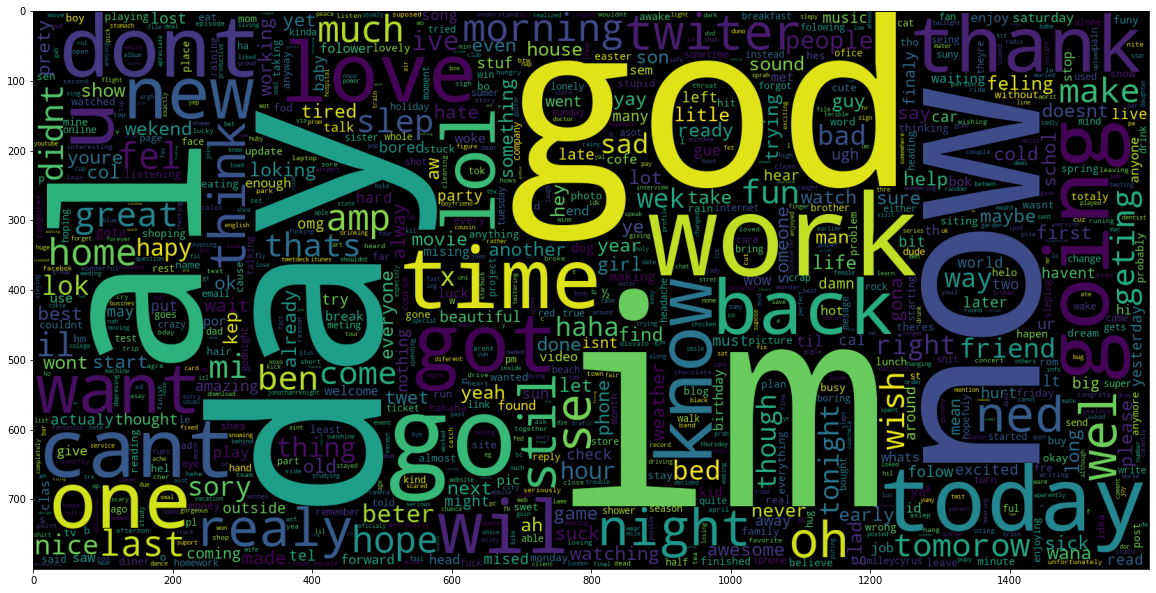

In [44]:
word_cloud = WordCloud(max_words = 1000 , width = 1600 , height = 800, collocations=False)
plt.figure(figsize = (20,20))
wc = word_cloud.generate(" ".join(data["text"]))
plt.imshow(wc)

### Tweets Tokenization

In [45]:
tokenizer = RegexpTokenizer(r'\w+')
data['text'] = data['text'].apply(tokenizer.tokenize)

In [46]:
data['text'].head()

799999     [i, love, healthuandpets, u, guys, r, the, best]
800000    [im, meting, up, with, one, of, my, besties, t...
800001    [darealsunisakim, thanks, for, the, twiter, ad...
800002    [being, sick, can, be, realy, cheap, when, it,...
800003    [lovesbroklyn, he, has, that, efect, on, every...
Name: text, dtype: object

### Stemming

In [47]:
import nltk

In [48]:
%%time
st = nltk.PorterStemmer()
def stemming_on_text(data):
    text = [st.stem(word) for word in data]
    return data

data['text']= data['text'].apply(lambda x: stemming_on_text(x))

CPU times: user 11 s, sys: 0 ns, total: 11 s
Wall time: 11.1 s


In [49]:
data['text'].head()

799999     [i, love, healthuandpets, u, guys, r, the, best]
800000    [im, meting, up, with, one, of, my, besties, t...
800001    [darealsunisakim, thanks, for, the, twiter, ad...
800002    [being, sick, can, be, realy, cheap, when, it,...
800003    [lovesbroklyn, he, has, that, efect, on, every...
Name: text, dtype: object

### Lemmatization

In [50]:
%%time
lm = nltk.WordNetLemmatizer()
def lemmatizer_on_text(data):
    text = [lm.lemmatize(word) for word in data]
    return data

data['text'] = data['text'].apply(lambda x: lemmatizer_on_text(x))

CPU times: user 4.22 s, sys: 46.6 ms, total: 4.26 s
Wall time: 4.27 s


In [51]:
data['text'].head()

799999     [i, love, healthuandpets, u, guys, r, the, best]
800000    [im, meting, up, with, one, of, my, besties, t...
800001    [darealsunisakim, thanks, for, the, twiter, ad...
800002    [being, sick, can, be, realy, cheap, when, it,...
800003    [lovesbroklyn, he, has, that, efect, on, every...
Name: text, dtype: object

### Seperating Input Features and Label

In [52]:
X=data.text
y=data.label

In [54]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing import sequence

In [55]:
max_len = 500
tok = Tokenizer(num_words=2000)
tok.fit_on_texts(X)
sequences = tok.texts_to_sequences(X)
sequences_matrix = sequence.pad_sequences(sequences,maxlen=max_len)

In [56]:
sequences_matrix.shape

(40000, 500)

In [57]:
from sklearn.model_selection import train_test_split

In [58]:
X_train, X_test, Y_train, Y_test = train_test_split(sequences_matrix, y, test_size=0.2, random_state=1)

In [59]:
import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras.layers import LSTM, Activation, Dense, Dropout, Input, Embedding
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import RMSprop

### Simple Neural Network Model with LSTM

In [60]:
model = Sequential(
    [
        Input(name='inputs',shape=[max_len]),
        Embedding(2000,50,input_length=max_len),
        LSTM(64),
        Dense(256,activation='relu'),
        Dropout(0.5),
        Dense(1,activation='sigmoid')        
    ]
)

2022-08-22 18:13:21.082906: I tensorflow/core/common_runtime/process_util.cc:146] Creating new thread pool with default inter op setting: 2. Tune using inter_op_parallelism_threads for best performance.


In [61]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 500, 50)           100000    
_________________________________________________________________
lstm (LSTM)                  (None, 64)                29440     
_________________________________________________________________
dense (Dense)                (None, 256)               16640     
_________________________________________________________________
dropout (Dropout)            (None, 256)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 257       
Total params: 146,337
Trainable params: 146,337
Non-trainable params: 0
_________________________________________________________________


In [62]:
model.compile(loss='binary_crossentropy',optimizer=RMSprop(),metrics=['accuracy'])

In [63]:
history=model.fit(X_train,Y_train,batch_size=128,epochs=6, validation_split=0.1)

2022-08-22 18:13:23.348388: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)


Epoch 1/6
225/225 [==============================] - 154s 673ms/step - loss: 0.5541 - accuracy: 0.7167 - val_loss: 0.5129 - val_accuracy: 0.7556
Epoch 2/6
225/225 [==============================] - 155s 688ms/step - loss: 0.4810 - accuracy: 0.7772 - val_loss: 1.2359 - val_accuracy: 0.5059
Epoch 3/6
225/225 [==============================] - 164s 731ms/step - loss: 0.5053 - accuracy: 0.7544 - val_loss: 0.4939 - val_accuracy: 0.7619
Epoch 4/6
225/225 [==============================] - 149s 664ms/step - loss: 0.5174 - accuracy: 0.7508 - val_loss: 0.4958 - val_accuracy: 0.7547
Epoch 5/6
225/225 [==============================] - 149s 663ms/step - loss: 0.4843 - accuracy: 0.7710 - val_loss: 0.5103 - val_accuracy: 0.7550
Epoch 6/6
225/225 [==============================] - 149s 663ms/step - loss: 0.4548 - accuracy: 0.7884 - val_loss: 0.5113 - val_accuracy: 0.7672


In [64]:
accr1 = model.evaluate(X_test,Y_test)

250/250 [==============================] - 34s 135ms/step - loss: 0.4941 - accuracy: 0.7638


In [65]:
print('Test set\n  Accuracy: {:0.2f}'.format(accr1[1]))

Test set
  Accuracy: 0.76


In [66]:
y_pred = model.predict(X_test)
y_pred = (y_pred > 0.5) 

In [67]:
from sklearn.metrics import confusion_matrix
conf_mat=confusion_matrix(Y_test, y_pred)

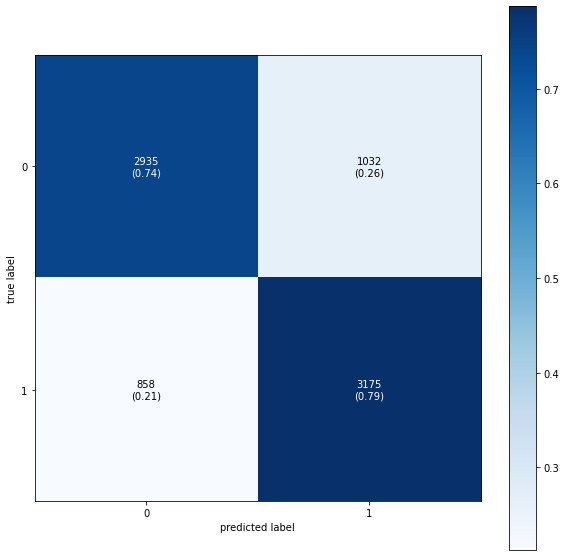

In [68]:
from mlxtend.plotting import plot_confusion_matrix
fig, ax = plot_confusion_matrix(conf_mat=conf_mat,figsize=(10, 10),
                                show_absolute=True,
                                show_normed=True,
                                colorbar=True)
plt.show()

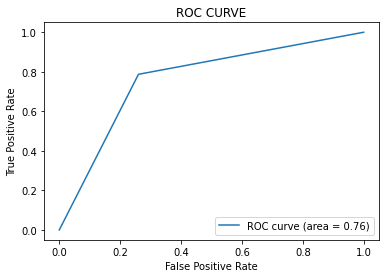

In [69]:
from sklearn.metrics import roc_curve, auc
fpr, tpr, thresholds = roc_curve(Y_test, y_pred)
roc_auc = auc(fpr, tpr)
plt.figure()
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC CURVE')
plt.legend(loc="lower right")
plt.show()

### MLP Classifier

In [70]:
from sklearn.neural_network import MLPClassifier

In [71]:
clf = MLPClassifier(random_state=1, max_iter=300).fit(X_train, Y_train)

In [72]:
preds_mlp=clf.predict(X_test)

In [73]:
from sklearn.metrics import classification_report

In [74]:
print(classification_report(Y_test, preds_mlp))

              precision    recall  f1-score   support

           0       0.52      0.53      0.52      3967
           1       0.53      0.51      0.52      4033

    accuracy                           0.52      8000
   macro avg       0.52      0.52      0.52      8000
weighted avg       0.52      0.52      0.52      8000



In [75]:
conf_mat_mlp=confusion_matrix(Y_test, preds_mlp)

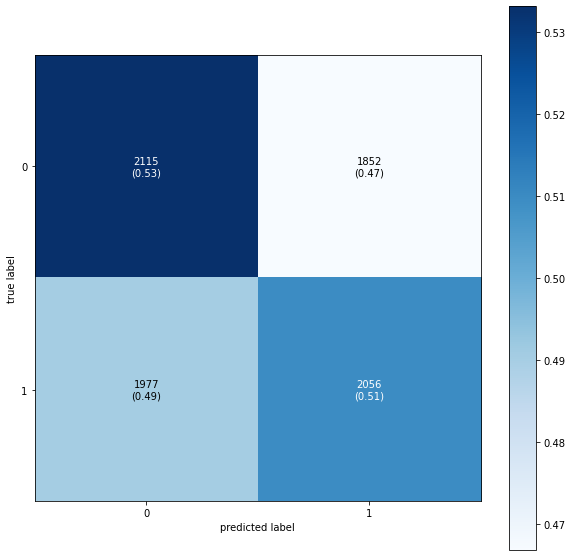

In [76]:
fig, ax = plot_confusion_matrix(conf_mat=conf_mat_mlp,figsize=(10, 10),
                                show_absolute=True,
                                show_normed=True,
                                colorbar=True)
plt.show()

### Linear SVC

In [82]:
from sklearn.svm import LinearSVC

In [83]:
SVCmodel = LinearSVC()
SVCmodel.fit(X_train, Y_train)
y_pred_svc = SVCmodel.predict(X_test)
print(classification_report(Y_test, y_pred_svc))
cf_matrix = confusion_matrix(Y_test, y_pred_svc)
categories  = ['Negative','Positive']
group_names = ['True Neg','False Pos', 'False Neg','True Pos']
group_percentages = ['{0:.2%}'.format(value) for value in cf_matrix.flatten() / np.sum(cf_matrix)]
labels = [f'{v1}\n{v2}' for v1, v2 in zip(group_names,group_percentages)]
labels = np.asarray(labels).reshape(2,2)

              precision    recall  f1-score   support

           0       0.49      0.57      0.53      3967
           1       0.50      0.41      0.45      4033

    accuracy                           0.49      8000
   macro avg       0.49      0.49      0.49      8000
weighted avg       0.49      0.49      0.49      8000



Text(0.5, 1.0, 'Confusion Matrix')

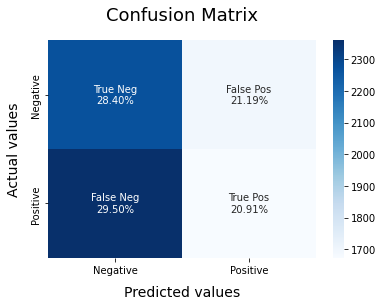

In [84]:
sns.heatmap(cf_matrix, annot = labels, cmap = 'Blues',fmt = '',
                xticklabels = categories, yticklabels = categories)
plt.xlabel("Predicted values", fontdict = {'size':14}, labelpad = 10)
plt.ylabel("Actual values"   , fontdict = {'size':14}, labelpad = 10)
plt.title ("Confusion Matrix", fontdict = {'size':18}, pad = 20)

### SGDClassifier

In [85]:
from sklearn.linear_model import SGDClassifier

In [86]:
sgdmodel = SGDClassifier(max_iter=1000, tol=1e-3).fit(X_train,Y_train)

In [88]:
y_pred_sgd = sgdmodel.predict(X_test)

In [89]:
print(classification_report(Y_test, y_pred_sgd))
cf_matrix = confusion_matrix(Y_test, y_pred_sgd)
categories  = ['Negative','Positive']
group_names = ['True Neg','False Pos', 'False Neg','True Pos']
group_percentages = ['{0:.2%}'.format(value) for value in cf_matrix.flatten() / np.sum(cf_matrix)]
labels = [f'{v1}\n{v2}' for v1, v2 in zip(group_names,group_percentages)]
labels = np.asarray(labels).reshape(2,2)

              precision    recall  f1-score   support

           0       0.51      0.53      0.52      3967
           1       0.51      0.49      0.50      4033

    accuracy                           0.51      8000
   macro avg       0.51      0.51      0.51      8000
weighted avg       0.51      0.51      0.51      8000



Text(0.5, 1.0, 'Confusion Matrix')

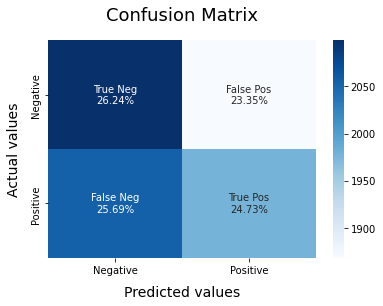

In [90]:
sns.heatmap(cf_matrix, annot = labels, cmap = 'Blues',fmt = '',
                xticklabels = categories, yticklabels = categories)
plt.xlabel("Predicted values", fontdict = {'size':14}, labelpad = 10)
plt.ylabel("Actual values"   , fontdict = {'size':14}, labelpad = 10)
plt.title ("Confusion Matrix", fontdict = {'size':18}, pad = 20)